In [1]:
pip install ST_DBSCAN

Note: you may need to restart the kernel to use updated packages.


In [95]:
%matplotlib inline
import ipywidgets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from st_dbscan import ST_DBSCAN
import matplotlib.colors as mpl_colors


DATA = pd.read_csv("sick_reviews.csv")
DATA.head()
df_X = DATA[['latitude','longitude']]
df_X.to_csv('latlong.csv')

In [47]:
from datetime import datetime
df = pd.DataFrame()
df = DATA
date = pd.to_datetime(df['date'])
date

0       2012-12-06 17:14:21
1       2016-05-20 05:40:25
2       2012-06-30 18:32:20
3       2014-05-27 01:07:26
4       2016-09-06 05:46:17
                ...        
12219   2011-10-24 04:09:23
12220   2016-11-21 13:52:13
12221   2018-10-21 04:16:42
12222   2017-11-05 00:31:29
12223   2018-07-06 22:55:33
Name: date, Length: 12224, dtype: datetime64[ns]

In [48]:
df['date'] = date
print(df['date'].min())
print(df['date'].max())
print(df['date'] - df['date'].min())
print((df['date'].max() - df['date'].min()))




2005-12-28 20:28:33
2018-11-14 15:28:32
0       2534 days 20:45:48
1       3795 days 09:11:52
2       2375 days 22:03:47
3       3071 days 04:38:53
4       3904 days 09:17:44
               ...        
12219   2125 days 07:40:50
12220   3980 days 17:23:40
12221   4679 days 07:48:09
12222   4329 days 04:02:56
12223   4573 days 02:27:00
Name: date, Length: 12224, dtype: timedelta64[ns]
4703 days 18:59:59


In [49]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
name                    object
address                 object
city                    object
state                   object
postal_code            float64
latitude               float64
longitude              float64
text                    object
date            datetime64[ns]
score                  float64
dtype: object

In [50]:
print(df['latitude'].min())
print(df['latitude'].max())
print((df['latitude'].max() - df['latitude'].min()))
print(df['longitude'].min())
print(df['longitude'].max())

33.2178145
43.252157700000005
10.034343200000002
-115.4354310036
-79.65014920000002


In [51]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [52]:
import geopy.distance

coords_1 = (33.2178145,-115.4354310036 )
coords_2 = (43.252157700000005, -79.65014920000002)

print(geopy.distance.vincenty(coords_1, coords_2).km)

3295.434593709583


/Users/zainabazizzaveri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [53]:
# normalize the data
df['latitude'] = (df['latitude'] - df['latitude'].min()) / (df['latitude'].max() - df['latitude'].min())
df['latitude']

0        0.186833
1        0.026005
2        0.026005
3        0.016611
4        0.023165
           ...   
12219    0.020498
12220    0.201213
12221    0.056006
12222    0.012924
12223    0.286026
Name: latitude, Length: 12224, dtype: float64

In [54]:
df['longitude'] = (df['longitude'] - df['longitude'].min()) / (df['longitude'].max() - df['longitude'].min())
df['longitude']

0        0.966216
1        0.098084
2        0.098084
3        0.101475
4        0.103870
           ...   
12219    0.100001
12220    0.969601
12221    0.098146
12222    0.096526
12223    0.006849
Name: longitude, Length: 12224, dtype: float64

In [55]:
df['date'] = (df['date'] - df['date'].min()) / (df['date'].max() - df['date'].min())
df['date']

0        0.538898
1        0.806877
2        0.505107
3        0.652919
4        0.830051
           ...   
12219    0.451831
12220    0.846280
12221    0.994799
12222    0.920357
12223    0.972216
Name: date, Length: 12224, dtype: float64

In [56]:
# transform to numpy array
data = df.loc[:, ['date','latitude','longitude']].values

In [120]:
import math
n = 7099
min_samples = math.log(n)
min_samples

8.867709208039386

In [129]:
st_dbscan = ST_DBSCAN(eps1 = 0.03, eps2 = 0.00063789, min_samples = 9) 
# for list of all parameter description see - src code comments

In [130]:
st_dbscan.fit(data)

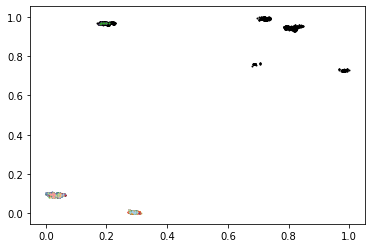

In [131]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

plot(data[:,1:], st_dbscan.labels)

In [132]:
df['cluster'] = st_dbscan.labels.tolist()
df['cluster'].unique()

array([ -1,   0,  35,   1,   2,   3,   4,   5, 128,   6,  37,   7,   8,
         9,  10,  11,  12,  13,  14,  55,  15,  16,  89,  17,  18,  19,
        20,  21,  22,  23,  24,  94,  25,  26,  27,  28, 104, 122,  42,
        29,  30,  68,  81, 117,  31,  32,  33,  34,  36,  38,  39,  40,
        73, 132,  91,  41, 118,  43,  44,  45,  46,  92,  62,  47,  48,
       100,  49,  50,  51,  52,  53,  54, 131,  79,  58,  87,  56,  66,
       105,  57, 119,  59,  60,  61, 120,  77,  63,  64, 121,  65, 127,
       110,  67,  69,  78,  70, 123,  71,  72,  99,  74,  75,  76, 108,
       102, 130, 107,  80,  82,  83,  84,  85,  97,  86, 133, 126,  90,
        96,  88, 125,  93, 109, 129, 124,  95, 106,  98, 101, 115, 111,
       103, 116, 134, 113, 112, 114])

In [133]:
df['date'] = date
df

,Unnamed: 0,Unnamed: 0.1,name,address,city,state,postal_code,latitude,longitude,text,date,score,cluster
0,21,21,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210.0,0.186833,0.966216,I love sushi and japanese food. I was looking...,2012-12-06 17:14:21,0.888218,-1
1,907,907,Yummy Yummy Chinese Restaurant,"2765 N Scottsdale Rd, Ste 105",Scottsdale,AZ,85257.0,0.026005,0.098084,My First time in Scottsdale was last weekend. ...,2016-05-20 05:40:25,0.953063,0
2,908,908,Yummy Yummy Chinese Restaurant,"2765 N Scottsdale Rd, Ste 105",Scottsdale,AZ,85257.0,0.026005,0.098084,"Ok, I am reviewing this so I will go with 3 st...",2012-06-30 18:32:20,0.999676,-1
3,1469,1469,Piggly's At the Fair,1633 S Stapley Dr,Mesa,AZ,85204.0,0.016611,0.101475,I ate at Pigglys for dinner last night. Had a ...,2014-05-27 01:07:26,0.945725,35
4,1537,1537,Arbys Restaurant Higley Rd,1927 N Higley Rd,Mesa,AZ,85205.0,0.023165,0.103870,I rated this a 1 star because the guy that ser...,2016-09-06 05:46:17,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,4665603,4665605,Burrito Express,450 N Alma School R,Mesa,AZ,85201.0,0.020498,0.100001,I don't understand why everyone likes this pla...,2011-10-24 04:09:23,0.927771,-1
12220,4666120,4666122,Cook Out,5715 N Sharon Amity Rd,Charlotte,NC,28215.0,0.201213,0.969601,"If you're coming here after 2:30am, don't expe...",2016-11-21 13:52:13,0.954895,-1
12221,4666345,4666347,Cherry On Top,"32421 N Scottsdale Rd, Ste 115",Scottsdale,AZ,85266.0,0.056006,0.098146,55 cents an ounce???? Wow. What a premium Far ...,2018-10-21 04:16:42,0.998578,76
12222,4666383,4666385,Subway,"4747 E Elliot Rd, Ste 33",Phoenix,AZ,85044.0,0.012924,0.096526,Came here yesterday around 3pm & got the spicy...,2017-11-05 00:31:29,0.997833,66


In [134]:
plt.clf()
# This section filters out columns
# Options to be removed are initializaed in tuples. Simply felt better because tuples are immutable.
x_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
y_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
x_axis_options = [e for e in df.columns if e not in x_irrelevant_options]
y_axis_options = [e for e in df.columns if e not in y_irrelevant_options]

# This section generates the widget itself
@ipywidgets.interact(x = x_axis_options, y= y_axis_options, colormap = plt.colormaps(),sym_log = True)
def plot(x = 'longitude',y = 'latitude', colormap = 'jet',sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(16,9))
    CAX = ax.scatter(df[x],df[y], cmap=colormap, norm = norm, c=(df['cluster']))
    fig.suptitle('test', fontsize=23)
    plt.xlabel(x, fontsize=18)
    plt.ylabel(y, fontsize=18)
    plt.colorbar(CAX, extend = 'both')
    # Rotates the x-axis labels if they are object(s) like 'shape' or 'city' to promote readability
    if df[x].dtype == 'object':
        plt.xticks(rotation=90)
    elif df[x].dtype == 'float64':
        plt.xticks(rotation=0)

    plt.show()

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', index=6, options=('Unnamed: 0.1', 'address', 'city', 'state', …

In [65]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [135]:
df.groupby('cluster').count()['score']

cluster
-1      4249
 0       114
 1        69
 2       693
 3        17
        ... 
 130      12
 131       5
 132      11
 133       9
 134       9
Name: score, Length: 136, dtype: int64

In [139]:
a = df[df['cluster']==134]
print(a['date'].min())
print(a['date'].max())

2014-08-29 05:05:00
2014-09-03 15:27:04


In [92]:
df.to_csv("datatocluster.csv")

In [142]:
b = df[df['cluster']==2]
b

,Unnamed: 0,Unnamed: 0.1,name,address,city,state,postal_code,latitude,longitude,text,date,score,cluster
6,2075,2075,Chipotle Mexican Grill,3475 Las Vegas Blvd S,Las Vegas,NV,89109.0,0.289235,0.007368,Just ate here and got super sick. There must h...,2017-08-18 02:16:18,0.999715,2
34,9498,9498,Fuku Burger Chinatown,3429 S Jones Blvd,Las Vegas,NV,89146.0,0.289888,0.005872,My bf and I were so excited to try this place ...,2017-07-29 10:22:44,1.000000,2
39,10588,10588,McDonald's,2550 E Sunset Rd,Las Vegas,NV,89120.0,0.284435,0.008943,Don't go. This place will give u food poisonin...,2017-03-27 13:44:20,0.963269,2
40,10810,10810,Subway,"7377 S Jones Blvd, Ste 105",Las Vegas,NV,89139.0,0.282769,0.005855,My boyfriend just got the worst food poisoning...,2017-04-19 17:31:51,0.992672,2
53,19779,19779,Lazy Dog Restaurant & Bar,6509 Las Vegas Blvd S,Las Vegas,NV,89119.0,0.284257,0.007310,LAZY DOG DOES NOT CARE ABOUT YOUR PETS. \nThey...,2017-06-29 18:21:29,0.709490,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12162,4642494,4642496,Phil's Italian Steak House,3300 Las Vegas Blvd S,Las Vegas,NV,89136.0,0.289681,0.007349,Honestly... I never in my life felt more discr...,2017-09-06 12:52:56,0.716413,2
12173,4647352,4647354,Sushi Kaya,"4355 Spring Mountain Rd, Ste 101B",Las Vegas,NV,89102.0,0.289815,0.006632,This was my favorite sushi restaurant for the ...,2017-05-12 21:58:29,1.000000,2
12202,4656596,4656598,Papaya King,4503 Paradise Rd,Las Vegas,NV,89169.0,0.288001,0.007890,Food poisoning!! After eating the most disappo...,2017-08-27 21:16:29,0.950204,2
12209,4659787,4659789,Chayo Mexican Kitchen + Tequila Bar,3545 S Las Vegas Blvd,Las Vegas,NV,89109.0,0.289000,0.007369,"Wow. Greeted after sitting for about 15 mins ,...",2017-06-15 03:35:30,0.621166,2


In [143]:
print(b['date'].min())
print(b['date'].max())

2017-02-05 20:20:44
2017-09-30 04:18:14
